3

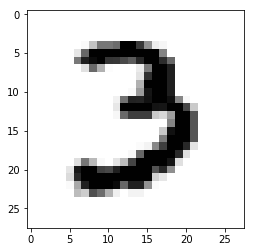

In [15]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Splitting Process

from sklearn.model_selection import train_test_split

# Training Process

from sklearn.linear_model import SGDClassifier


# Performance Measures 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

#Take copies of the master dataframes

train = mnist_train.copy()
test = mnist_test.copy()
train.shape
test.shape
X, y = train.drop(labels = ["label"],axis = 1), train["label"]
X.shape
array=X.values
some_digit = array[9]
some_digit_show = plt.imshow(array[9].reshape(28,28), cmap=mpl.cm.binary)
y[9]


3

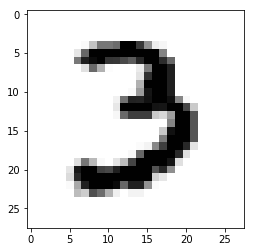

In [2]:
array=X.values
some_digit = array[9]
some_digit_show = plt.imshow(array[9].reshape(28,28), cmap=mpl.cm.binary)
y[9]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [5]:
sgd_clf = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [8]:
sgd_clf.predict([array[4]])

array([False])

In [9]:
cv_score_sgd = cross_val_score(sgd_clf, X_train, y_train_3, cv = 3, scoring = "accuracy")


In [10]:
cv_score_sgd = np.mean(cv_score_sgd)
cv_score_sgd

0.9557940369157288

In [11]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv= 3)


confusion_matrix(y_train_3, y_train_pred)

array([[33292,   663],
       [ 1008,  2837]], dtype=int64)

In [12]:
predictions_sgd = sgd_clf.predict(X_test).astype(int)

In [16]:
sgd_clf_multi = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf_multi.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
y_test_pred = sgd_clf.predict(X_test)

In [19]:
y_test_pred

array([False, False, False, ..., False, False, False])

In [20]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
30743    7
6839     1
17164    6
21723    3
12272    1
5030     2
25222    7
34680    4
4976     3
19565    3
27947    6
31133    4
3220     9
27143    5
12902    2
10151    6
16341    0
28553    0
1395     0
12793    8
5751     6
11911    3
        ..
22109    5
19671    8
24167    1
6231     7
32765    1
5864     4
13600    7
10901    5
21884    3
20864    7
33306    4
20250    5
21807    6
3615     5
27976    0
1052     6
27435    6
25795    2
41007    8
10669    9
27556    8
3197     2
19227    1
3391     3
35267    5
16041    4
4867     2
28123    7
3780     7
7155     5
Name: label, Length: 4200, dtype: int64